Accuracy with n_estimators=10: 0.8182004299314157
Confusion Matrix:
 [[6782  632]
 [1144 1211]]

Best Accuracy: 0.8339645818405159 with n_estimators=73
Best Confusion Matrix:
 [[7015  399]
 [1223 1132]]


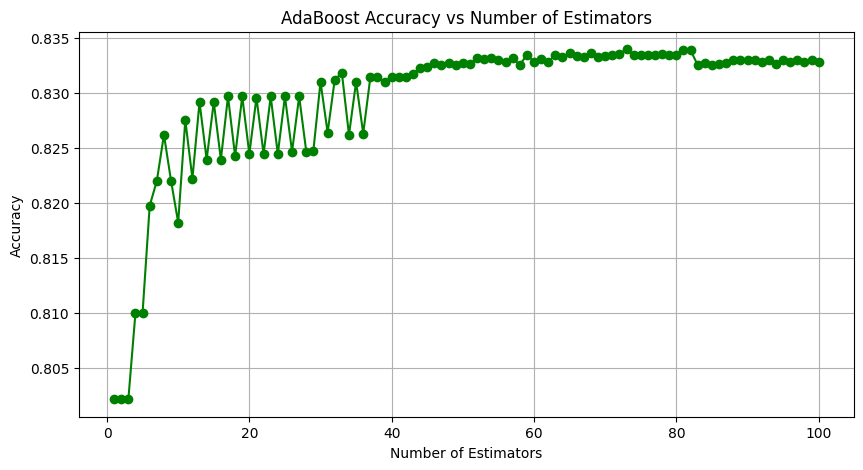

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/income (1).csv")
X = df.drop("income_level", axis=1)
y = df["income_level"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. AdaBoost with n_estimators = 10
clf_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
clf_10.fit(X_train, y_train)
y_pred_10 = clf_10.predict(X_test)
score_10 = accuracy_score(y_test, y_pred_10)
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

print("Accuracy with n_estimators=10:", score_10)
print("Confusion Matrix:\n", conf_matrix_10)

# 2. Fine-tuning: Try n_estimators from 1 to 100
scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    clf = AdaBoostClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Best result
best_score = max(scores)
best_n = n_estimators_range[scores.index(best_score)]

# Best model evaluation
clf_best = AdaBoostClassifier(n_estimators=best_n, random_state=42)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"\nBest Accuracy: {best_score} with n_estimators={best_n}")
print("Best Confusion Matrix:\n", conf_matrix_best)

# 3. Plot
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, scores, marker='o', color='green')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
